<a href="https://colab.research.google.com/github/Jricardossilva/Data-Science/blob/main/Mapa_de_Calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 
import matplotlib.pyplot as plt
import zipfile

cv2.__version__

'4.1.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pose_path = '/content/drive/MyDrive/pose.zip'
zip_object = zipfile.ZipFile(file = pose_path, mode = "r")
zip_object.extractall("./")

In [ ]:
imagens_path = '/content/drive/MyDrive/imagens.zip'
zip_object = zipfile.ZipFile(file = imagens_path, mode = "r")
zip_object.extractall("./")
zip_object.close()

In [ ]:
arquivo_proto = '/content/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivo_pesos = '/content/pose/body/mpi/pose_iter_160000.caffemodel'

In [ ]:
imagem = cv2.imread("/content/imagens/body/multiple/multiple_1.jpeg")

In [ ]:
imagem.shape

(640, 640, 3)

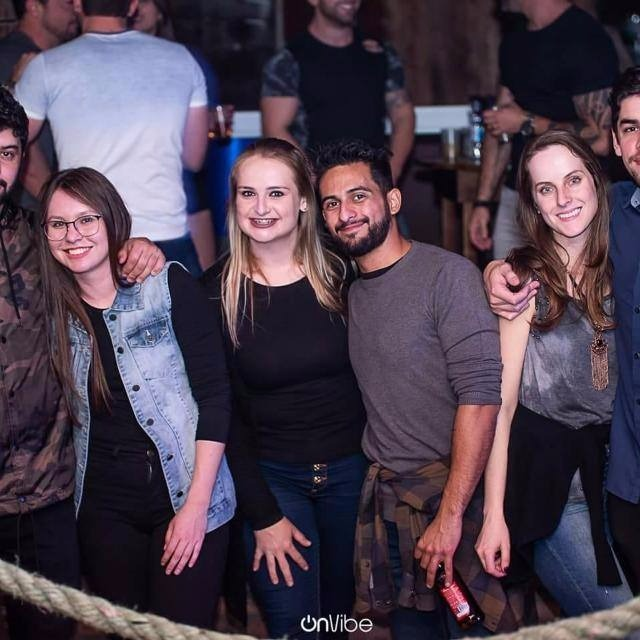

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [ ]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [ ]:
imagem_largura, imagem_altura

(640, 640)

In [ ]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

In [ ]:
altura_entrada = 368
largura_entrada = int((altura_entrada/imagem_altura) * imagem_largura)

In [ ]:
largura_entrada, altura_entrada

(368, 368)

In [ ]:
blob_entrada = cv2.dnn.blobFromImage(image = imagem, scalefactor = 1.0 / 255,
                                     size = (largura_entrada, altura_entrada),
                                     mean = (0, 0, 0), swapRB = False, crop = False)

In [ ]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [ ]:
saida.shape

(1, 44, 46, 46)

In [ ]:
saida[0].shape

(44, 46, 46)

In [ ]:
saida[0][0]

array([[0.00049211, 0.00054041, 0.00080381, ..., 0.0004188 , 0.00048497,
        0.00056236],
       [0.00053339, 0.00058671, 0.00055662, ..., 0.00045707, 0.00048965,
        0.00057936],
       [0.00051214, 0.00057876, 0.00055863, ..., 0.00052235, 0.00050592,
        0.00054233],
       ...,
       [0.00052932, 0.00052271, 0.00055545, ..., 0.00058366, 0.00061254,
        0.00079496],
       [0.0005545 , 0.00055392, 0.00056722, ..., 0.00065917, 0.00077181,
        0.00096974],
       [0.00058384, 0.00059912, 0.00055851, ..., 0.00086402, 0.00097046,
        0.0009022 ]], dtype=float32)

In [ ]:
ponto = 15
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))

(-0.5, 639.5, 639.5, -0.5)

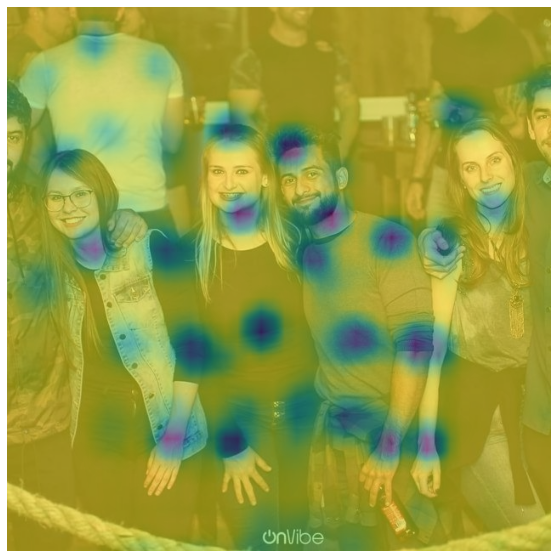

In [ ]:
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha = 0.6)
plt.axis("off")

(-0.5, 639.5, 639.5, -0.5)

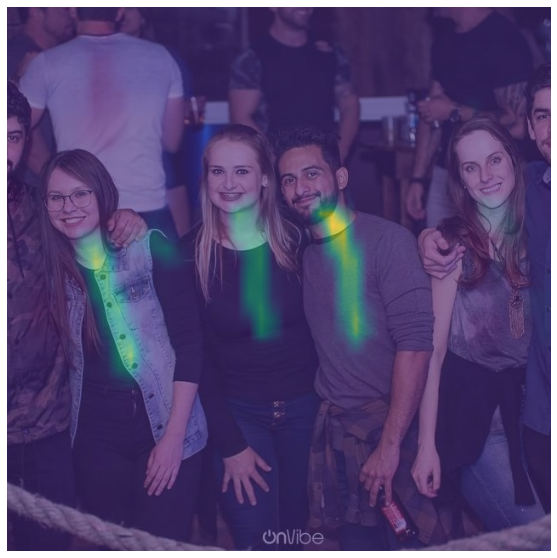

In [ ]:
ponto = 30
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha = 0.6)
plt.axis("off")